In [6]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 763 kB/s            
You should consider upgrading via the '/home/nidhal/miniconda3/bin/python -m pip install --upgrade pip' command.


In [17]:
# Importing modules
import pandas as pd


# Read data
intents_data = pd.read_csv('question_responce.csv')

# Print head
intents_data.head()

,Unnamed: 0,responce,question
0,603,@115904 We'll be sure to pass along your kind ...,@AmericanAir Erica on the lax team is amazing ...
1,605,@115904 Our apologies for the delay in respond...,@AmericanAir Could you have someone on your la...
2,608,"@115905 Aww, that's definitely a future pilot ...",Ben Tennyson and an American Airlines pilot. 🎃...
3,612,@115906 We're sorry for your frustration.,"@AmericanAir Right, but I earned those. I also..."
4,618,@115909 We're glad you got to kick back and en...,"Thank you, @AmericanAir for playing #ThisIsUs ..."


In [18]:
# Load the regular expression library
import re

def cleaning(line):
    line = re.sub('[,\.!?]','', line)
    line = re.sub(r'@[A-Za-z0-9]+','', line)
    line = re.sub(r'#[A-Za-z0-9]+','', line)
    return line
    
"""
# Remove punctuation
intents_data['question_processed'] = \
intents_data['question'].map(lambda x: re.sub('[,\.!?]','', x))
# mentions
intents_data['question'].map(lambda x: re.sub(r'@[A-Za-z0-9]+','', x))
# hashtags
intents_data['question'].map(lambda x: re.sub(r'#[A-Za-z0-9]+','', x))
"""

intents_data["question"] = intents_data["question"].str.replace("@AmericanAir ","")
intents_data["question"] = intents_data["question"].str.replace("@AmericanAir's ","")

intents_data["question"] = intents_data["question"].apply(cleaning)
intents_data["responce"] = intents_data["responce"].apply(cleaning)

# Convert to lowercase
intents_data['question_processed'] = \
intents_data['question'].map(lambda x: x.lower())

# Print out the first rows of the questions
intents_data['question_processed'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:10: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<>:10: DeprecationWarning: invalid escape sequence \.
/tmp/ipykernel_15484/2151852043.py:5: DeprecationWarning: invalid escape sequence \.
  line = re.sub('[,\.!?]','', line)
/tmp/ipykernel_15484/2151852043.py:10: DeprecationWarning: invalid escape sequence \.
  """


0    erica on the lax team is amazing give her a ra...
1    could you have someone on your lax team availa...
2    ben tennyson and an american airlines pilot 🎃 ...
3    right but i earned those i also shouldn’t have...
4    thank you for playing  and for having great fl...
Name: question_processed, dtype: object

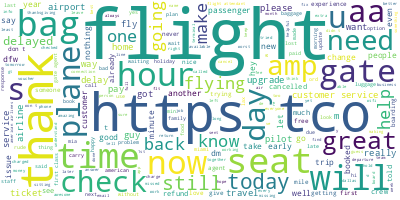

In [19]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(intents_data['question_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [20]:
import gensim
from gensim.utils import simple_preprocess
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = intents_data.question_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/nidhal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['erica', 'lax', 'team', 'amazing', 'give', 'raise', 'ty']


In [21]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [26]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.036*"flight" + 0.011*"get" + 0.011*"aa" + 0.008*"tco" + 0.008*"https" + '
  '0.006*"thank" + 0.006*"even" + 0.005*"delayed" + 0.005*"seat" + 0.005*"us"'),
 (1,
  '0.023*"flight" + 0.008*"time" + 0.008*"thanks" + 0.008*"gate" + '
  '0.007*"flights" + 0.006*"hour" + 0.006*"would" + 0.006*"plane" + '
  '0.006*"help" + 0.005*"service"'),
 (2,
  '0.026*"https" + 0.026*"tco" + 0.026*"flight" + 0.008*"flights" + '
  '0.007*"great" + 0.007*"amp" + 0.006*"check" + 0.006*"aa" + 0.006*"time" + '
  '0.005*"dfw"'),
 (3,
  '0.027*"flight" + 0.010*"get" + 0.010*"https" + 0.010*"tco" + 0.008*"check" '
  '+ 0.007*"bag" + 0.007*"flights" + 0.006*"need" + 0.006*"airline" + '
  '0.006*"another"'),
 (4,
  '0.033*"flight" + 0.016*"tco" + 0.016*"https" + 0.010*"thanks" + '
  '0.008*"first" + 0.008*"gate" + 0.007*"aa" + 0.007*"us" + 0.006*"time" + '
  '0.006*"service"'),
 (5,
  '0.021*"flight" + 0.010*"please" + 0.009*"aa" + 0.008*"customer" + '
  '0.007*"fly" + 0.007*"know" + 0.006*"https" + 0.006*